In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Lab 7: Great British Bake Off (A/B Test)

Welcome to Data 8 Lab 7! This week's lab will focus on A/B Testing using data from the ever-popular British television show, [*The Great British Bake Off*](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off).

#### **Helpful Resource:**
- [Python Reference](http://data8.org/fa24/reference/)

**Recommended Readings:**

* [Error Probabilities](https://inferentialthinking.com/chapters/11/4/Error_Probabilities.html)
* [A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)

**Getting help on lab**: Whenever you feel stuck or need some further clarification, find a GSI or tutor, and they'll be happy to help!

As a reminder, here are the policies for getting full credit:

1. For students enrolled in in-person <span style="color: #BC412B">**Regular Labs**</span>, you will receive 80% lab credit by **attending** lab discussion and 20% lab credit for passing all test cases and submitting it to Gradescope by **5pm on the Friday the same week it was released**.

2. For students enrolled in <span style="color: #04888B">**Self Service**</span>, you will receive full lab credit by **completing** the notebook, passing all test cases, and **submitting** it to Gradescope by **5pm on the Friday the same week it was released**.

**Submission**: Once you’re finished, run all cells besides the last one, select File > Save Notebook, and then execute the final cell. The result will contain a zip file that you can use to submit on Gradescope.

Let's begin by setting up the tests and imports by running the cell below.

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', (FutureWarning, np.VisibleDeprecationWarning))

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 0. Mid-Semester Survey

We would like you to fill out the mid-semester survey before proceeding any further in this assignment.

Please fill out the survey below and input the secret phrase that is shown at the end of the form when you submit. Please assign this phrase to `mid_secret` as a string in the cell below!

Find the survey [here](https://docs.google.com/forms/d/e/1FAIpQLSeCozfJuAbGSzHk7pEUnvBCaBtx8VPe6kQE8yi_XutpOh757w/viewform?usp=sf_link)

In [ ]:
mid_secret = ...

In [ ]:
grader.check("q0")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1. A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions — distribution “A” and distribution “B”. We may also refer to an A/B test as a permutation test.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step. Oftentimes, we use an A/B test to determine whether or not two samples came from the same underlying distribution.

<hr style="border: 1px solid #fdb515;" />

**Question 1.1.** The following statements are the steps of an A/B hypothesis test presented in a *random order*:

1. Choose a test statistic (typically the difference in means between two categories)

2. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times

3. Find the value of the observed test statistic

4. Calculate the p-value based off your observed and simulated test statistics

5. Define a null and alternate model

6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Assign `ab_test_order` to an array of integers that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test.


In [3]:
ab_test_order = make_array(5,1,3,2,4,6)

In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 1.2.** If the null hypothesis of an A/B test is correct, should the order of labels affect the differences in means between each group? Why do we shuffle labels in an A/B test? If you are in a lab section, confirm your answer with a neighbor or staff member before moving on. 


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2. The Great British Bake Off

>"The Great British Bake Off (often abbreviated to Bake Off or GBBO) is a British television baking competition, produced by Love Productions, in which a group of amateur bakers compete against each other in a series of rounds, attempting to impress a group of judges with their baking skills" [Wikipedia](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off)

For every week of the competition, the judges assign one contestant the title "Star Baker". Ultimately, one winner is crowned every season. Using this information, we would like to investigate how winning Star Baker awards affects the odds of winning a season of the show.

<hr style="border: 1px solid #fdb515;" />

**Question 2.1.** We want to know whether winning more Star Baker awards ___causes___ an increase in likelihood of winning a season.  Why is it not sufficient to compare star baker rates for winners and losers?


boi vi se bi phu thuoc vao nang luc cua moi nguoi

<hr style="border: 1px solid #fdb515;" />

### Running an Experiment

We are going to run the following hypothesis test to determine the association between winning and number of Star Baker awards. The population we are examining is every contestant from seasons 2 through 11 of GBBO. We are going to use the following null and alternative hypotheses:

**Null hypothesis:** The distribution of Star Baker awards between contestants who won their season and contestants who did not win their season is the same.

**Alternative hypothesis:** Contestants who win their season of the show will win more Star Baker awards on average.

Our alternative hypothesis is related to our suspicion that contestants who win more Star Baker awards are more skilled, so they are more likely to win the season.

---

**Question 2.2.** Should we use an A/B test to test these hypotheses? If yes, what is our "A" group and what is our "B" group?


Yes, the A is normal and B is shuffled winner which should prove the more starbaker doesn't affect

Check your answers with your neighbors or a staff member before you move on to the next section.

The `bakers` table below describes the number of star baker awards each contest won and whether or not they won their season (`1` if they won, `0` if they did not win). The data was manually aggregated from Wikipedia for seasons 2-11 of the show. We randomized the order of rows as to not spoil the outcome of the show.

In [5]:
bakers = Table.read_table("star_bakers.csv")
bakers.show(3)

star baker awards,won
3,1
0,0
1,0


<hr style="border: 1px solid #fdb515;" />

**Question 2.3.** Create a new table called `means` that contains the mean number of star baker awards for bakers who did not win (`won==0`) and bakers that did win (`won==1`). The table should have the column names `won` and `star baker awards mean`.

In [31]:
means = bakers.group("won",np.mean)
means

won,star baker awards mean
0,0.651786
1,1.5


In [8]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.4.** Visualize the distribution of Star Baker awards for winners and non-winners as overlaid histograms. You should use the bins we provided.

Hint: You will want to use the group argument of `tbl.hist`. In order to produce several overlayed histograms based on unique values in a given column, we can do something like `tbl.hist(..., group=<col_name>, bins=...)`. This will graph one histogram for each unique value in the specified column all on a single plot.


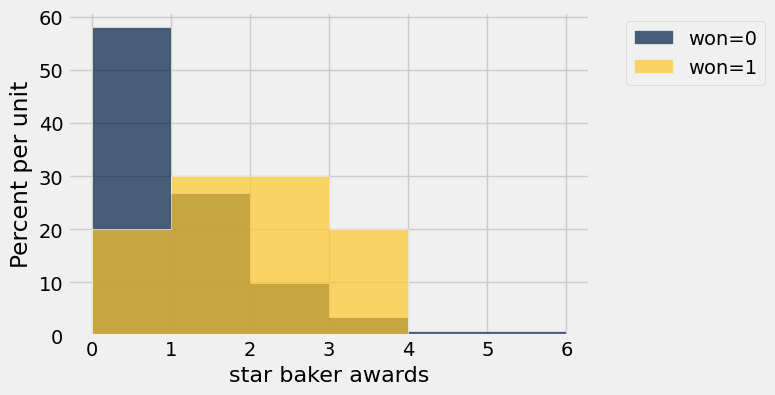

In [25]:
useful_bins = np.arange(0, 7)
bakers.hist("star baker awards",group='won', bins=useful_bins)

 <hr style="border: 1px solid #fdb515;" />

**Question 2.5.** We want to figure out if there is a difference between the distribution of Star Baker awards between winners and non winners. 

What should the test statistic be? Which values of this test statistic support the null, and which values support the alternative? **Assign `test_option` to the number corresponding to the correct test statistic.**

1. Absolute value of the difference between the means between both groups; high values support the null
2. Absolute value of the difference between the means between both groups; low values support the null
3. Average Star Baker awards for winners - average Star Baker awards for non-winners; high values support the null
4. Average Star Baker awards for winners - average Star Baker awards for non-winners; low values support the null

Before moving on, confirm your answer with a peer or in the discussion forums.

_Hint:_ You should think about what measures we use to describe a distribution. 


In [28]:
test_option = 4

In [29]:
grader.check("q2_5")

q2_5 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.6.** Set `observed_difference` to the observed test statistic using the `means` table. 


In [34]:
observed_difference = means.column("star baker awards mean").item(1)-means.column("star baker awards mean").item(0)
observed_difference

0.8482142857142857

In [35]:
grader.check("q2_6")

q2_6 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.7.** Given a table like `bakers`, a label column `label_col`, and a values column `val_col`, write a function that calculates the appropriate test statistic.

*Hint:* Make sure that you are taking the directionality of our alternative hypothesis into account.


In [163]:
def find_test_stat(tbl, label_col, val_col):
    means = tbl.group(label_col,np.mean)
    return means.column("star baker awards mean").item(1)-means.column("star baker awards mean").item(0)

find_test_stat(bakers, "won", "star baker awards")

0.8482142857142857

In [104]:
grader.check("q2_7")

q2_7 results: All test cases passed!

When we run a simulation for A/B testing, we resample by **shuffling the labels** of the original sample. If the null hypothesis is true and the star baker award distributions are the same, we expect that the difference in mean star baker awards to not change when `"won"` labels are changed.

<hr style="border: 1px solid #fdb515;" />

**Question 2.8.** Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.

*Hint:* Textbook chapter [12.1.4](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#predicting-the-statistic-under-the-null-hypothesis) can help!

In [194]:
def simulate_and_test_statistic(tbl, labels_col, values_col):
    shuffled = tbl.sample(with_replacement=False).column(labels_col)
    n_tbl =  tbl.with_columns("s",shuffled)
    return find_test_stat(n_tbl, "s", values_col)

simulate_and_test_statistic(bakers, "won", "star baker awards")

0.3035714285714286

In [195]:
grader.check("q2_8")


q2_8 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.9.** Simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`.


In [196]:
# This cell might take a couple seconds to run
differences = make_array()

for i in range(5000):
    differences= np.append(differences, simulate_and_test_statistic(bakers, "won", "star baker awards"))
                                                 
differences

array([ 0.08571429, -0.24107143,  0.19464286, ..., -0.45892857,
        0.08571429, -0.24107143])

In [197]:
grader.check("q2_9")

q2_9 results: All test cases passed!

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic as a red dot.

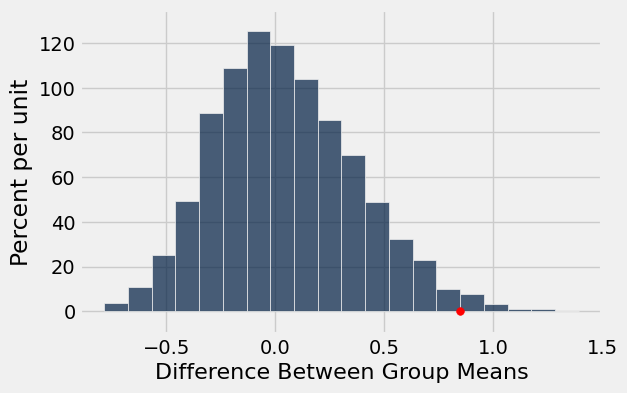

In [198]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=2)
plots.ylim(-0.1, 1.35);

<hr style="border: 1px solid #fdb515;" />

**Question 2.10.** Find the p-value for your test and assign it to `empirical_p`.


In [206]:
empirical_p = np.count_nonzero(differences>=observed_difference)/5000
empirical_p

0.0144

In [207]:
grader.check("q2_10")

q2_10 results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

**Question 2.11.** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about the association between star baker awards and winning? What can you claim about causation from your statistical analysis? Confirm your answer with a peer, instructor or in the discussion forums. 


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## All done!

**Milo** wants to be your #1 supporter by congratulating you on finishing Lab 07!

<img src="milo.jpg" alt="cat being supportive of Berkeley students" width="300"/>



---

You're done with lab!

**Important submission information:**
- **Run all the tests** and verify that they all pass
- **Save** from the **File** menu
- **Run the final cell to generate the zip file**
- **Click the link to download the zip file**
- Then, go to [Gradescope](https://www.gradescope.com/courses/835871) and submit the zip file to the corresponding assignment. The name of this assignment is "Lab XX Autograder", where XX is the lab number -- 01, 02, 03, etc.

- If you finish early in Regular Lab, **ask one of the staff members to check you off**.

**It is your responsibility to make sure your work is saved before running the last cell.**


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)